# Analyzing CIA Factbook Data Using SQLite and Python

## This data contains information and statistics about all countries (e.g. population, area, and growth rates)

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")

q = "select * from sqlite_master where type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


## Take a look at some population statistics

In [2]:
# first five rows of facts table
q = "select * from facts limit 5;"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q = "select min(population), max(population), min(population_growth),max(population_growth) from facts;"
pd.read_sql_query(q,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


## Looks like some of the population numbers (0 and 7.2 billion) are strange

In [4]:
# get countries with 0 population
q = "select name from facts where population = 0;"
pd.read_sql_query(q,conn)

,name
0,Antarctica


In [5]:
# get countries with a population of 7256490011
q = "select name from facts where population = 7256490011;"
pd.read_sql_query(q,conn)

,name
0,World


## It looks like Antarctica has a population of 0 (I guess 0 indigenous residents) and one of the table entries is "World" which has the population of 7.2 billion.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f014848da90>,
      dtype=object)

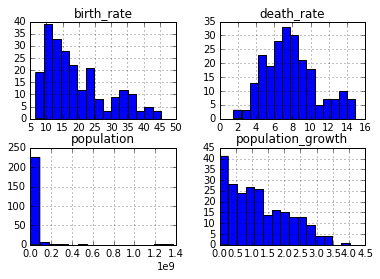

In [10]:
# generate histograms for the rest of the countries in
# the table

%matplotlib inline
q = "select population, population_growth, birth_rate, death_rate from facts where (population < 7256490011 and population > 0);"
data = pd.read_sql_query(q,conn)
data.hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00d283c6a0>]],
      dtype=object)

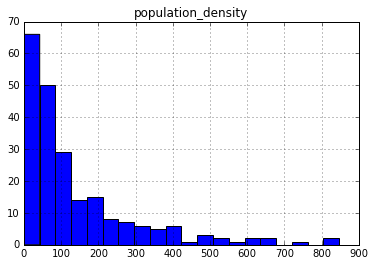

In [15]:
# population density
q = "select population/area_land as population_density from facts where (population < 7256490011 and population > 0 and population_density < 1000);"
data = pd.read_sql_query(q,conn)
data.hist(bins=20)